In [1]:
import numpy as np
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
# optical
# curl "http://skyserver.sdss.org/dr13/en/tools/search/x_results.aspx?searchtool=Rectangular&uband=&gband=&rband=&iband=11%2C20.5&zband=&jband=&hband=&kband=&TaskName=Skyserver.Search.Rectangular&ReturnHtml=true&whichphotometry=optical&coordtype=galactic&min_ra=11&max_ra=19&min_dec=69&max_dec=87&min_u=0&max_u=20&min_g=0&max_g=20&min_r=0&max_r=20&check_i=i&min_i=11&max_i=21&min_z=0&max_z=20&min_j=0&max_j=20&min_h=0&max_h=20&min_k=0&max_k=20&format=csv&TableName=&limit=500000" > sdss_l\=15_b\=78_optical.csv

# infrared
# 

catfname = 'sdss_l=15_b=78_optical.csv'
sdss_dat = np.genfromtxt('/home/abrahamn/xcor_data/ir_catalogs/'+catfname,delimiter=',',skip_header=2)

In [3]:
f = open('/home/abrahamn/xcor_data/ir_catalogs/'+catfname)
f.readline()
cols = f.readline().strip().split(',')
f.close()

In [13]:
cols[13]

'z'

In [5]:
sdss_dat.shape

(475284, 19)

In [6]:
# https://www.sdss3.org/dr8/glossary.php
STAR_TYPE = 6
GALAXY_TYPE = 3

In [23]:
i_band_col = 12
z_band_col = 13

i_mags = sdss_dat[:,i_band_col]
# z_mags = sdss_dat[:,z_band_col]

i_jys = 3631.*10.**(-i_mags/2.5)
# z_jys = 3631.*10.**(-z_mags/2.5)

types = sdss_dat[:,6]

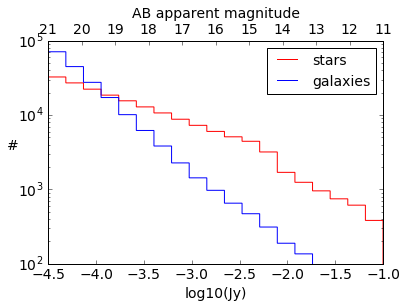

In [26]:
matplotlib.rcParams.update({'font.size': 14})
ax1 = plt.subplot(111)

bins = np.linspace(-4.5,-1,20)
h = plt.hist(np.log10(i_jys[types==STAR_TYPE]),bins,color='r',histtype='step')
h = plt.hist(np.log10(i_jys[types==GALAXY_TYPE]),bins,color='b',histtype='step')
plt.gca().set_yscale('log')
plt.xlim([-4.5,-1])
plt.ylim([1.e2,1.e5])
plt.plot([-10,-10],[.1,.1],'r',label='stars')
plt.plot([-10,-10],[.1,.1],'b',label='galaxies')
plt.legend(fontsize=14)
plt.xlabel('log10(Jy)')
plt.ylabel('#',rotation=0)

magticks = np.arange(10,25,1)
jys_for_magticks = 3631.*10.**(-magticks/2.5)
g = (jys_for_magticks>1.e-5)&(jys_for_magticks<10.**(-.5))

ax2 = ax1.twiny()
ax2.set_xlim(ax1.get_xlim())
ax2.set_xticks(np.log10(jys_for_magticks[g]))
ax2.set_xticklabels(magticks[g])
ax2.set_xlabel("AB apparent magnitude")

# plt.savefig('cat4.png',bbox_inches='tight')

In [25]:
# matplotlib.rcParams.update({'font.size': 14})
# ax1 = plt.subplot(111)

# bins = np.linspace(-4.5,-1,20)
# h = plt.hist(np.log10(z_jys[types==STAR_TYPE]),bins,color='r',histtype='step')
# h = plt.hist(np.log10(z_jys[types==GALAXY_TYPE]),bins,color='b',histtype='step')
# plt.gca().set_yscale('log')
# plt.xlim([-4.5,-1])
# plt.ylim([1.e2,1.e5])
# plt.plot([-10,-10],[.1,.1],'r',label='stars')
# plt.plot([-10,-10],[.1,.1],'b',label='galaxies')
# plt.legend(fontsize=12)
# plt.xlabel('log10(Jy)')
# plt.ylabel('#',rotation=0)

# magticks = np.arange(10,25,1)
# jys_for_magticks = 3631.*10.**(-magticks/2.5)
# g = (jys_for_magticks>1.e-5)&(jys_for_magticks<10.**(-.5))

# ax2 = ax1.twiny()
# ax2.set_xlim(ax1.get_xlim())
# ax2.set_xticks(np.log10(jys_for_magticks[g]))
# ax2.set_xticklabels(magticks[g])
# ax2.set_xlabel("AB apparent magnitude")

# # plt.savefig('cat4.png',bbox_inches='tight')

In [9]:
np.log10(3631.*10.**(-21./2.5))

-4.8399737510871077

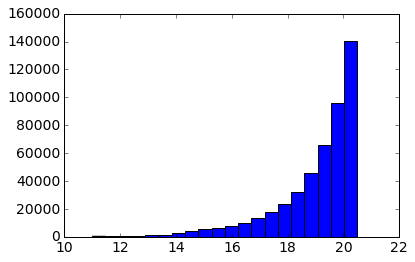

In [10]:
h =plt.hist(i_mags,20)